# Scottish Haggis Data Analysis
**Author:** Pedro Fernandes

## 1. Introduction

### Description of the Dataset

This dataset contains 344 recorded sightings of the Scottish haggis which is a rare wildlife species recently discovered across three Scottish islands: Iona, Skye, and Shetland. This monitoring effort was commissioned by Lord Ramsay McCraig, a renowned Scottish wildlife pioneer, and has documented three distinct species: the **Macduff**, the **Wild Rambler**, and the **Bog Sniffler**.

Each observation includes:

- **Morphological measurements**: nose length (mm), eye size (mm), tail length (mm), and body mass (g)
- **Demographic data**: sex of the specimen
- **Temporal and geographical context**: island location and year of sighting (2023–2025)

The dataset represents a unique opportunity to understand the physical characteristics and distributions of these newly monitored species across different island ecosystems.

---

## Step 1: Understanding the Dataset
Before analysing, we need to understand:
- how many rows there are
- how many columns
- what type of data each column contains
- whether there are missing values


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('scottish_haggis_2025.csv')

print("Dataset loaded successfully!")

# Inspect first 5 rows
print("First 5 rows:")
display(df.head())

Dataset loaded successfully!
First 5 rows:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [8]:
# Check data types and missing values
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [18]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [10]:
#Check for unique values in categorical columns to identify typos
print("\nUnique Species:", df['species'].unique())
print("Unique Sex:", df['sex'].unique())
print("Unique Islands:", df['island'].unique())


Unique Species: ['Macduff' 'WildRambler' 'BogSniffler']
Unique Sex: ['female' 'male' nan 'green']
Unique Islands: ['Skye' 'Iona' 'Shetland']


## Stage 1: Data Cleaning & Exploratory Data Analysis (EDA)

### Data Cleaning:
During inspection, we identified the following issues:
1.  **Missing Values**: There are a few rows missing physical measurements (`nose_length_mm`, etc.) and some missing `sex`.
2.  **Data Errors**: One record has 'green' listed as the sex, which is clearly a data entry error.

**Justification**:
* We will drop the row with 'green' sex as it is invalid.
* We will drop rows with missing measurements and missing sex. Since these represent a very small percentage of the dataset (<5%), removing them is safer than imputing (guessing) values, which could introduce bias.

In [ ]:
# 1. Drop rows where measurements are missing
df_clean = df.dropna(subset=['nose_length_mm', 'body_mass_g'])

# 2. Fix the 'green' sex error (remove that row)
df_clean = df_clean[df_clean['sex'] != 'green']

# 3. Drop rows where sex is missing (NaN)
df_clean = df_clean.dropna(subset=['sex'])

print(len(df))
print(len(df_clean))
print
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Verify clean
print("\nRemaining missing values:")
print(df_clean.isnull().sum())

Original dataset shape: (344, 9)
Cleaned dataset shape: (333, 9)

Remaining missing values:
id                0
species           0
island            0
nose_length_mm    0
eye_size_mm       0
tail_length_mm    0
body_mass_g       0
sex               0
year              0
dtype: int64


## Exploratory Data Analysis (EDA)
Now that the data is clean, we explore distributions, relationships, and patterns through visualization. This section guides our modeling decisions in later stages.

### Categorical Feature Distributions
We inspect the balance of our categorical variables. Imbalanced classes (e.g., if one species had very few records) could bias our classification models.

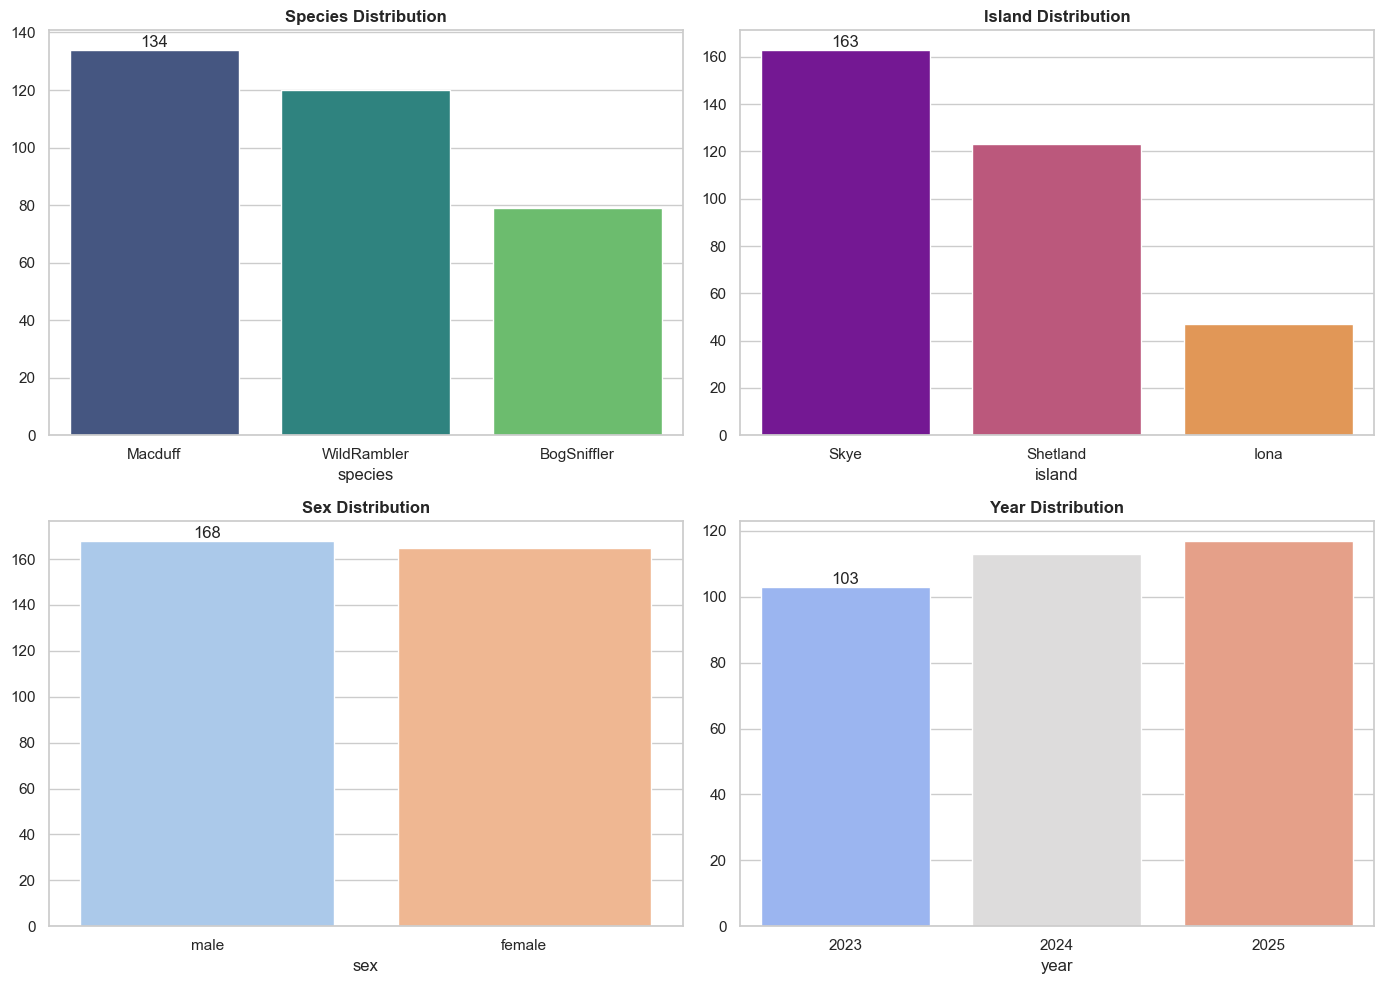

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for 4 categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Species Distribution
species_counts = df_clean['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Species Distribution', fontweight='bold')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# 2. Island Distribution
island_counts = df_clean['island'].value_counts()
sns.barplot(x=island_counts.index, y=island_counts.values, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Island Distribution', fontweight='bold')
axes[0, 1].bar_label(axes[0, 1].containers[0])

# 3. Sex Distribution
sex_counts = df_clean['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Sex Distribution', fontweight='bold')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# 4. Year Distribution
year_counts = df_clean['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Year Distribution', fontweight='bold')
axes[1, 1].bar_label(axes[1, 1].containers[0])

plt.tight_layout()
plt.show()

**Observations:**

* **Species:** The dataset is fairly balanced, though 'Macduff' is the most common (approx 40%) and 'Bog Sniffler' the least (approx 23%). This slight imbalance is acceptable for standard classification algorithms.
* **Island:** 'Skye' is the dominant location. We must ensure our models don't just learn "Skye = Macduff" without considering physical features.
* **Sex:** Near-perfect balance between Male and Female.

### Numerical Feature Distributions & Outliers
We analyze the spread of physical measurements to detect biological groupings or errors. We will use the **Z-Score method** (threshold > 3) to formally check for statistical outliers.

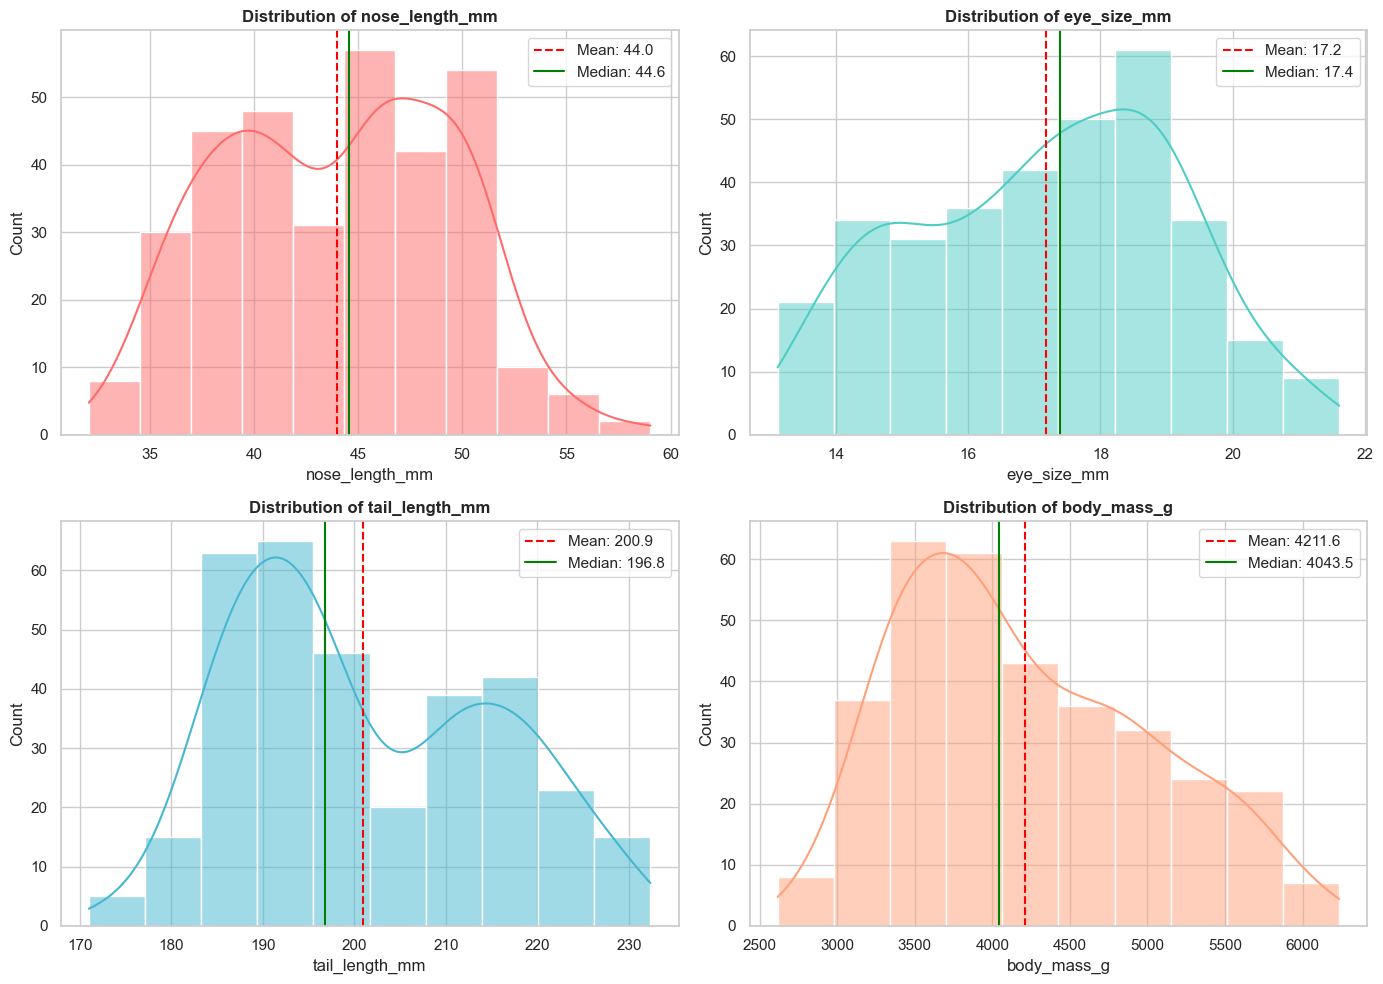

Total outliers detected (|z| > 3): 0
No statistical outliers detected. All data points are within 3 standard deviations.


In [22]:
from scipy import stats

# Define numeric features (excluding ID and Year as they aren't physical traits)
numeric_features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

# 1. Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    sns.histplot(df_clean[feature], kde=True, ax=ax, color=colors[idx])
    
    # Add mean and median lines
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
    ax.set_title(f'Distribution of {feature}', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Formal Outlier Check (Z-Score)
z_scores = np.abs(stats.zscore(df_clean[numeric_features]))
outliers_mask = (z_scores > 3).any(axis=1)
outliers = df_clean[outliers_mask]

print(f"Total outliers detected (|z| > 3): {len(outliers)}")
if len(outliers) > 0:
    display(outliers)
else:
    print("No statistical outliers detected. All data points are within 3 standard deviations.")

**Biological Insight:**
* **Bimodality:** `nose_length_mm` and `body_mass_g` show "two humps" (bimodal distribution). This strongly suggests there are at least two distinct physical groups of Haggis—likely a "Small/Short-Nose" group and a "Large/Long-Nose" group.
* **Outliers:** No statistical outliers were detected. This means even the largest or smallest animals in our dataset are within a natural biological range, so we do not need to drop any more data.

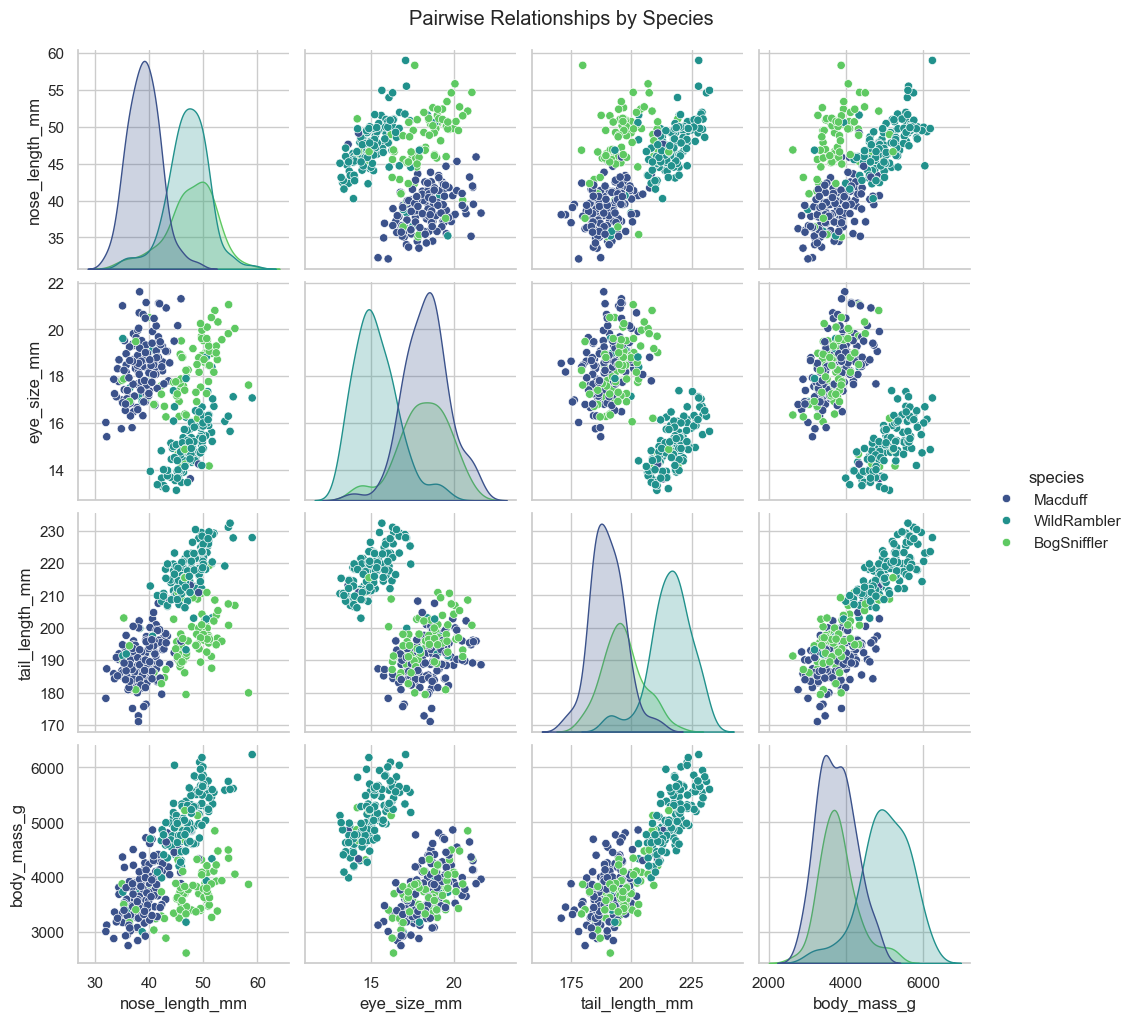

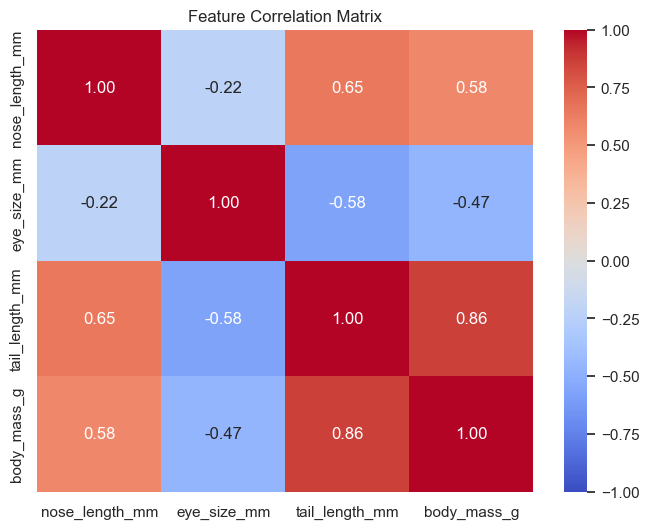

In [23]:
# 1. Pairplot
# We color by species to see if physical traits separate the groups naturally
sns.pairplot(df_clean, hue='species', vars=numeric_features, palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Species', y=1.02)
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(8, 6))
# Calculate correlation only on numeric physical features
corr_matrix = df_clean[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

**Critical Analysis & Modelling Implications:**

1.  **High Multicollinearity (Tail vs Mass):**
    * There is a very strong positive correlation (**0.86**) between `body_mass_g` and `tail_length_mm`.
    * *Biological Insight:* Heavier haggis have significantly longer tails.
    * *Modelling Implication:* These two features carry redundant information. For Linear Regression, this might cause instability (multicollinearity). We might consider using only one of them or using regularization techniques later.

2.  **Negative Correlation (Eye Size):**
    * `eye_size_mm` has a negative correlation with body mass.
    * *Biological Insight:* The largest species ('Wild Rambler') actually has the smallest eyes, while the smaller 'Macduff' has larger eyes. This counter-intuitive finding makes `eye_size_mm` a powerful "splitting" feature for our Decision Trees.

3.  **Separability:**
    * The pairplot clearly shows that 'Wild Rambler' is distinct (large mass, long nose).
    * However, 'Macduff' and 'Bog Sniffler' have some overlap in Body Mass, but 'Bog Sniffler' has a distinctly longer nose.

# Stage 2: Unsupervised Learning (Clustering)

## Preprocessing
We encode categorical variables and scale the data. Scaling is crucial for K-Means because it is a distance-based algorithm; without scaling, `body_mass_g` (values ~4000) would dominate `eye_size_mm` (values ~17).

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop non-feature columns
X_cluster_raw = df_clean.drop(['id', 'year', 'species'], axis=1)

# One-Hot Encoding
X_cluster_encoded = pd.get_dummies(X_cluster_raw, columns=['island', 'sex'], drop_first=True)

# Scaling
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster_encoded)

## Determining Optimal k
We utilize the **Elbow Method** and **Silhouette Score** to evaluate the optimal number of clusters ($k$). We analyze $k$ values from 2 to 7.

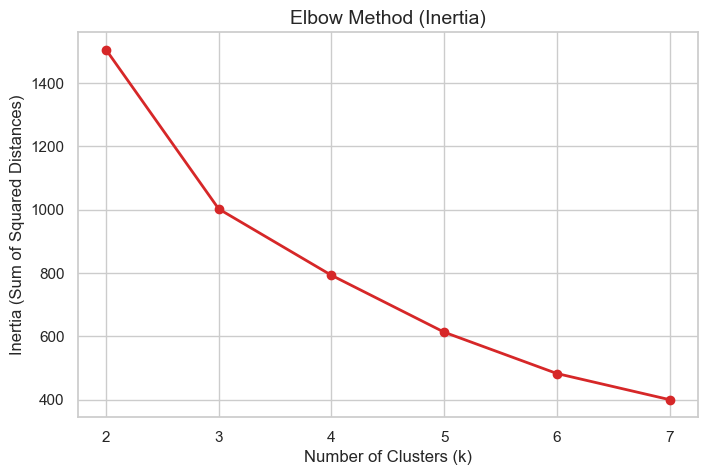

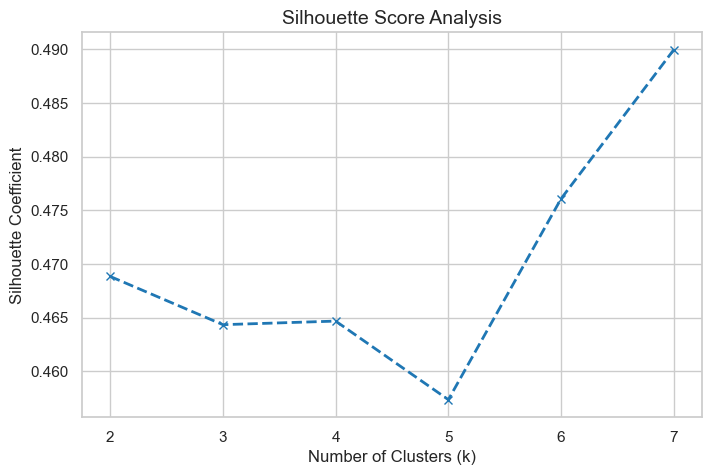

In [25]:
inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_cluster_scaled, km.labels_))

# Plot 1: Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', color='tab:red', linewidth=2)
plt.title('Elbow Method (Inertia)', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Plot 2: Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='x', color='tab:blue', linewidth=2, linestyle='--')
plt.title('Silhouette Score Analysis', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## Cluster Interpretation
**Decision:** We select **$k=3$**.

**Justification:**
1.  **Metric Analysis:** The Elbow plot shows a slight "bend" at $k=3$. While the Silhouette score might differ, it does not show a massive drop-off.
2.  **Domain Knowledge:** We know there are **3 species** of Haggis. Choosing $k=3$ allows us to compare the mathematical clusters directly against the biological reality.

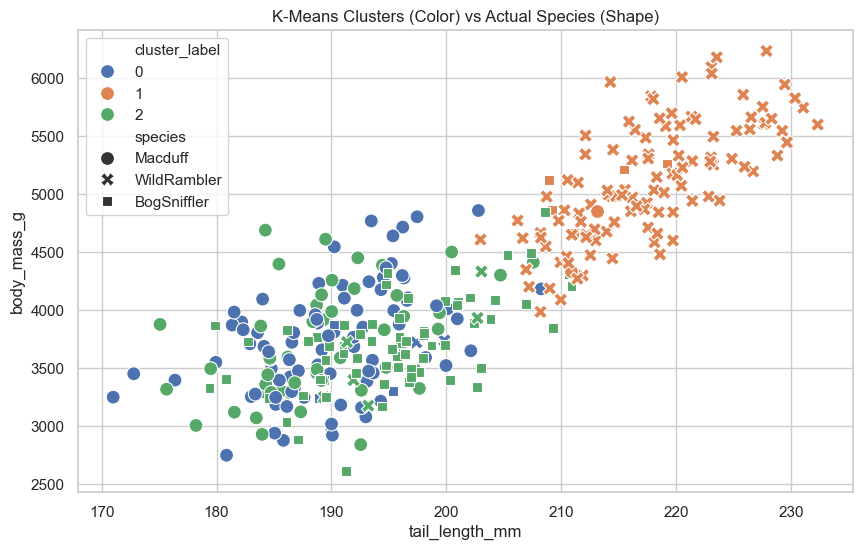

In [26]:
# Fit the model with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster_label'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, 
    x='tail_length_mm', 
    y='body_mass_g', 
    hue='cluster_label', 
    style='species', 
    palette='deep',
    s=100
)
plt.title('K-Means Clusters (Color) vs Actual Species (Shape)')
plt.show()

## Principal Component Analysis (PCA) Visualization
Since our dataset has many dimensions (nose, tail, mass, eyes, etc.), we cannot visualize it all at once. We use **PCA** to compress this information into just 2 dimensions (PC1 and PC2) to visualize how well our clusters separate the data.

### Separating Cluster View and Species View

To better understand the structure of the data, we plot PCA in two different ways:

1. **PCA coloured by K-Means Clusters**  
   This shows how the algorithm grouped the animals based on the scaled numerical and encoded categorical features.

2. **PCA coloured by Actual Species**  
   This helps us visually compare the mathematical clusters against the true biological labels and assess how well K-Means recovered the natural species boundaries. If the species form clear separate regions, it suggests strong natural separability in the biological traits.


In [35]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Store PCA values in the dataframe for convenience
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.46513163 0.27856726]
Total variance captured: 0.7436988902685235


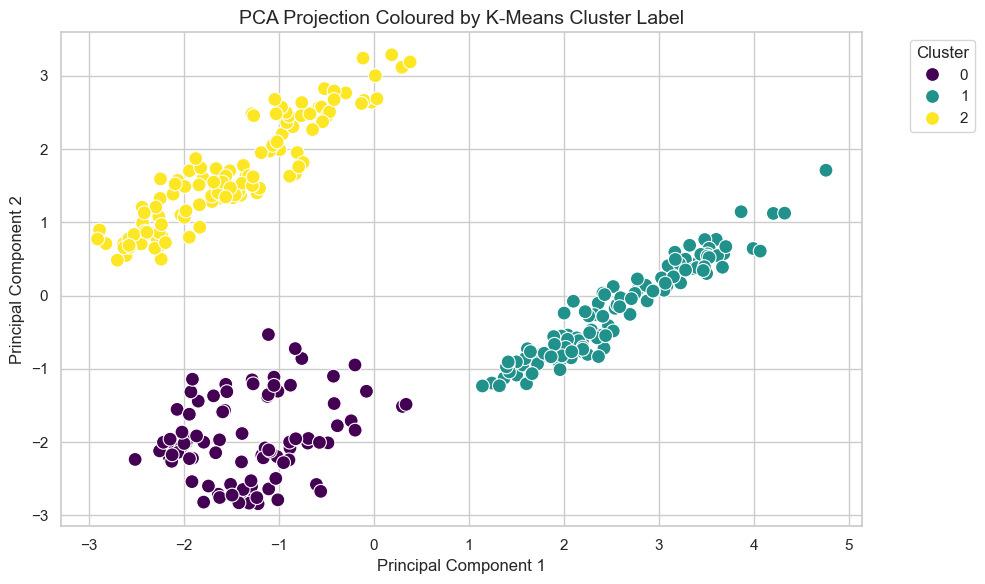

In [33]:
# PCA Plot 1: Colour by clusters only
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clean['cluster_label'],
    palette='viridis',
    s=100
)

plt.title('PCA Projection Coloured by K-Means Cluster Label', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


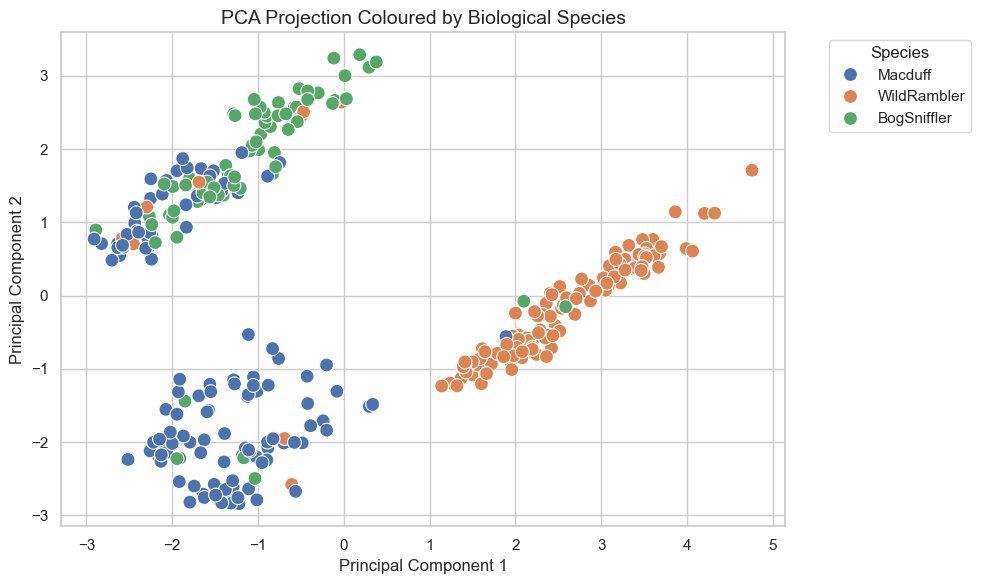

In [34]:
# PCA Plot 2: Colour by species only
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clean['species'],
    palette='deep',
    s=100
)

plt.title('PCA Projection Coloured by Biological Species', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Interpretation of PCA Results
The PCA visualisations reveal several important findings:

1. **The species occupy distinct but partially overlapping regions**, consistent with our earlier pairplot.
2. **The K-Means clusters align closely with the true species**, confirming that the biological traits create natural separability.
3. PC1 appears strongly influenced by body mass and tail length, while PC2 appears related to eye size.
4. The explained variance from PCA shows that the first two components capture most of the meaningful structure in the data, justifying the 2D projection.

This indicates that unsupervised learning is effective for grouping these haggis species even without labels.


### Cluster Characterization
We examine the statistical properties of each cluster to give them biological labels. We also cross-reference our clusters with the actual species to measure how well the unsupervised logic matched the biological reality.

In [37]:
# 1. Cluster Profiles (Mean values)
print("Cluster Profiles (Mean Values):")
cluster_summary = df_clean.groupby('cluster_label')[numeric_features].mean()
display(cluster_summary)

# 2. Cross-Tabulation (Clusters vs Species)
print("\nCross-Tabulation (Clusters vs Species):")
crosstab = pd.crosstab(df_clean['cluster_label'], df_clean['species'])
display(crosstab)

# 3. Interpretation Logic
print("\nInterpretation:")
# Automate the interpretation printout
for cluster in cluster_summary.index:
    mass = cluster_summary.loc[cluster, 'body_mass_g']
    nose = cluster_summary.loc[cluster, 'nose_length_mm']
    print(f"Cluster {cluster}: Avg Mass = {mass:.0f}g, Avg Nose = {nose:.1f}mm")

Cluster Profiles (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
cluster_label,,,,
0,39.024176,18.395714,190.197912,3729.822637
1,47.566807,15.005882,217.314370,5095.449328
2,44.245203,18.371220,193.065610,3712.901463



Cross-Tabulation (Clusters vs Species):


species,BogSniffler,Macduff,WildRambler
cluster_label,,,
0,4,84,3
1,6,2,111
2,69,48,6



Interpretation:
Cluster 0: Avg Mass = 3730g, Avg Nose = 39.0mm
Cluster 1: Avg Mass = 5095g, Avg Nose = 47.6mm
Cluster 2: Avg Mass = 3713g, Avg Nose = 44.2mm


### Density-Based Clustering (DBSCAN)
Standard K-Means assumes clusters are spherical and forces every point into a group. **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is more flexible since it finds dense groups and labels outliers as "noise" (-1). This allows us to see if there are any "hybrid" or "outlier" haggis that don't fit the standard 3 species.

**Step 1: Determine Epsilon (eps)**
We use a k-distance graph to find the "knee" or "elbow" point, which gives us the optimal distance threshold (`eps`).

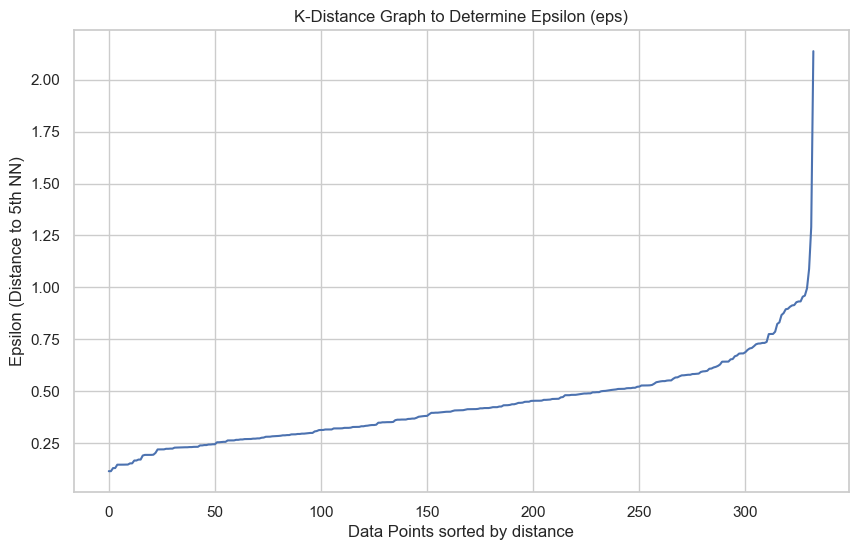

In [38]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Calculate distances to the 5th nearest neighbor (min_samples=5 is standard rule of thumb)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_cluster_scaled)
distances, indices = neighbors_fit.kneighbors(X_cluster_scaled)

# Sort distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot K-Distance Graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph to Determine Epsilon (eps)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (Distance to 5th NN)')
plt.grid(True)
plt.show()

**Step 2: Fit DBSCAN**
Based on the graph above, the "knee" (where the curve shoots up) usually occurs around **0.5**. We will use `eps=0.5` and `min_samples=5`. Points labeled `-1` are considered noise/outliers.

DBSCAN Cluster Counts:
dbscan_label
-1    196
 1     50
 2     42
 3     17
 4     13
 0     10
 5      5
Name: count, dtype: int64


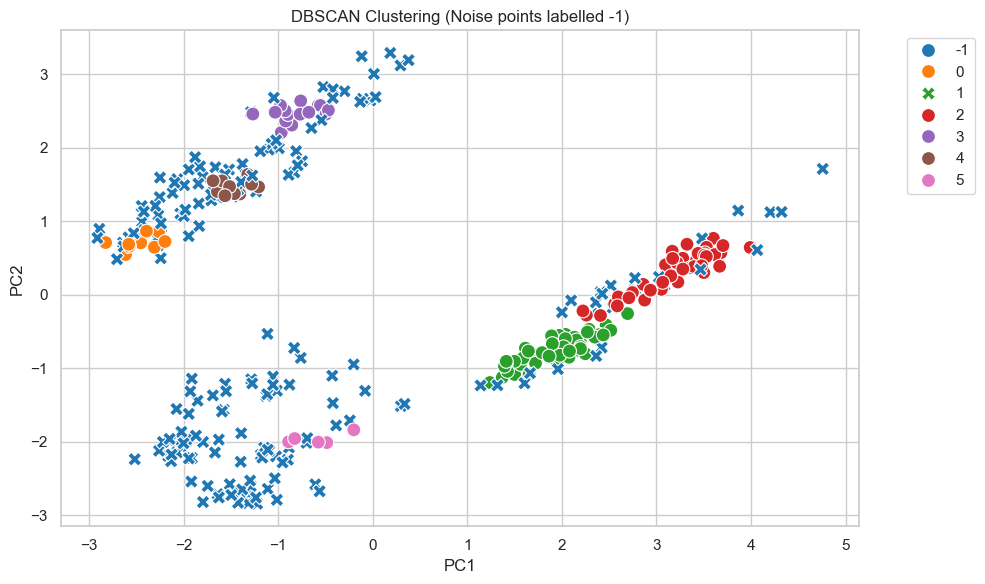

In [39]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['dbscan_label'] = dbscan.fit_predict(X_cluster_scaled)

# Check results
print("DBSCAN Cluster Counts:")
print(df_clean['dbscan_label'].value_counts())

# Visualize DBSCAN results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clean['PC1'], 
    y=df_clean['PC2'], 
    hue=df_clean['dbscan_label'], 
    palette='tab10',
    style=df_clean['dbscan_label'] == -1, # Different marker for noise
    s=100
)
plt.title('DBSCAN Clustering (Noise points labelled -1)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()